In [1]:
import numpy as np
import pandas as pd
import ast

In [119]:
files = [
    '../experiments/azure_openai/gpt-3.5-turbo/token/20240608/10_54/uncerta.csv',
    '../experiments/azure_openai/gpt-3.5-turbo/token/20240612/11_20/uncerta.csv',
    '../experiments/azure_openai/gpt-3.5-turbo/attribute/20240604/21_24/uncerta.csv'
]

In [120]:
csvs = []
for f in files:
    csvs.append(pd.read_csv(f))
uncerta_data = pd.concat(csvs)

In [121]:
uncerta_data.head()

,Unnamed: 0,total_time,tokens,predictions,top_k,faithfulness,model,dataset,uncerta(freq)_sample,uncerta(union)_sample,uncerta(intersection)_sample
0,0,6593.379037,6106437.1,118961.4,10,{'uncerta(freq)_sample': 0.0},uncerta(freq)_sample,abt_buy,"{'validity': 0.9999999999, 'proximity': 0.4999...",NaN,NaN
1,1,13403.364778,16547289.0,322529.0,10,{'uncerta(union)_sample': 0.0},uncerta(union)_sample,abt_buy,NaN,"{'validity': 0.99999999995, 'proximity': 0.499...",NaN
2,2,3021.276957,18543731.3,361415.7,10,{'uncerta(intersection)_sample': 0.0},uncerta(intersection)_sample,abt_buy,NaN,NaN,"{'validity': 0.9999999999, 'proximity': 0.6666..."
3,3,13999.829333,20871942.9,406635.6,10,{'uncerta(freq)_sample': 0.0},uncerta(freq)_sample,beers,"{'validity': 0.4999999999875, 'proximity': 0.2...",NaN,NaN
4,4,2298.027621,23704721.0,461611.8,10,{'uncerta(union)_sample': 0.0},uncerta(union)_sample,beers,NaN,"{'validity': 0.4999999999875, 'proximity': 0.2...",NaN


In [122]:
uncerta_data_filtered = uncerta_data[['total_time', 'tokens', 'predictions', 'top_k', 'dataset', 'model']]
uncerta_data_filtered['model'] = uncerta_data_filtered['model'].str.replace('\)_sample','')
uncerta_data_filtered['model'] = uncerta_data_filtered['model'].str.replace('uncerta\(','')
uncerta_data_filtered['model'] = uncerta_data_filtered['model'].str.replace('freq','frequent')
uncerta_data_filtered.to_csv('../experiments/azure_openai/gpt-3.5-turbo/token/varying-k.csv', index=False)
uncerta_data_filtered.head()

/var/folders/mr/6xnd0hrs6257283btx8ff88r0000gn/T/ipykernel_33862/892492723.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  uncerta_data_filtered['model'] = uncerta_data_filtered['model'].str.replace('\)_sample','')
/var/folders/mr/6xnd0hrs6257283btx8ff88r0000gn/T/ipykernel_33862/892492723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uncerta_data_filtered['model'] = uncerta_data_filtered['model'].str.replace('\)_sample','')
/var/folders/mr/6xnd0hrs6257283btx8ff88r0000gn/T/ipykernel_33862/892492723.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  uncerta_data_filtered['model'] = uncerta_data_filtered['model'].str.replace('uncerta\(','')

,total_time,tokens,predictions,top_k,dataset,model
0,6593.379037,6106437.1,118961.4,10,abt_buy,frequent
1,13403.364778,16547289.0,322529.0,10,abt_buy,union
2,3021.276957,18543731.3,361415.7,10,abt_buy,intersection
3,13999.829333,20871942.9,406635.6,10,beers,frequent
4,2298.027621,23704721.0,461611.8,10,beers,union


In [123]:
uncerta_data_grouped = uncerta_data_filtered.groupby(['dataset', 'model'])
uncerta_data_grouped.head()


,total_time,tokens,predictions,top_k,dataset,model
0,6593.379037,6106437.1,118961.4,10,abt_buy,frequent
1,13403.364778,16547289.0,322529.0,10,abt_buy,union
2,3021.276957,18543731.3,361415.7,10,abt_buy,intersection
3,13999.829333,20871942.9,406635.6,10,beers,frequent
4,2298.027621,23704721.0,461611.8,10,beers,union
5,10258.860315,26225899.9,510606.5,10,beers,intersection
6,1205.951499,26402647.7,514069.9,10,amazon_google,frequent
7,1396.177703,26583592.8,517615.6,10,amazon_google,union
8,342.572727,26755210.0,520978.4,10,amazon_google,intersection
9,12404.904319,27755684.2,540484.5,10,fodo_zaga,frequent


dataset         model       
abt_buy         frequent        [Axes(0.125,0.653529;0.775x0.226471), Axes(0.1...
                intersection    [Axes(0.125,0.653529;0.775x0.226471), Axes(0.1...
                union           [Axes(0.125,0.653529;0.775x0.226471), Axes(0.1...
amazon_google   frequent        [Axes(0.125,0.653529;0.775x0.226471), Axes(0.1...
                intersection    [Axes(0.125,0.653529;0.775x0.226471), Axes(0.1...
                union           [Axes(0.125,0.653529;0.775x0.226471), Axes(0.1...
beers           frequent        [Axes(0.125,0.653529;0.775x0.226471), Axes(0.1...
                intersection    [Axes(0.125,0.653529;0.775x0.226471), Axes(0.1...
                union           [Axes(0.125,0.653529;0.775x0.226471), Axes(0.1...
fodo_zaga       frequent        [Axes(0.125,0.653529;0.775x0.226471), Axes(0.1...
                intersection    [Axes(0.125,0.653529;0.775x0.226471), Axes(0.1...
                union           [Axes(0.125,0.653529;0.775x0.226471),

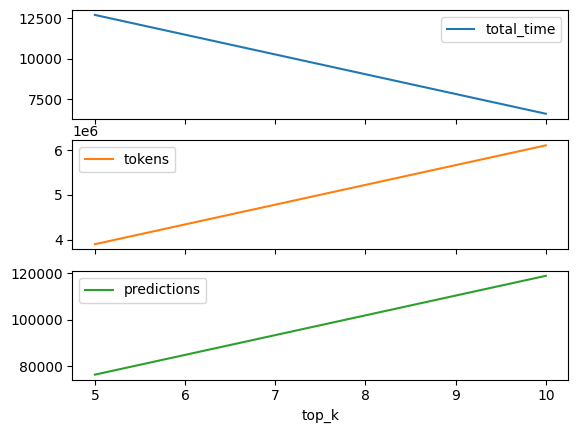

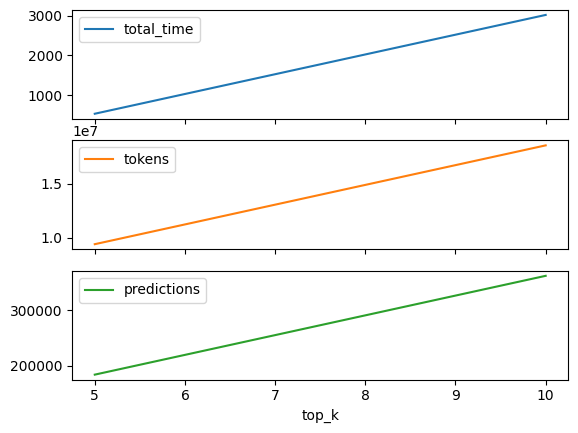

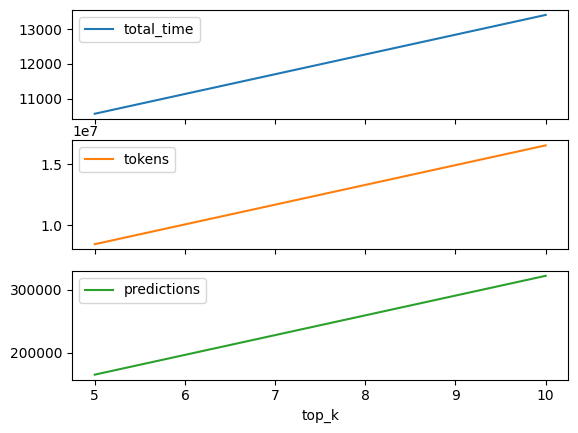

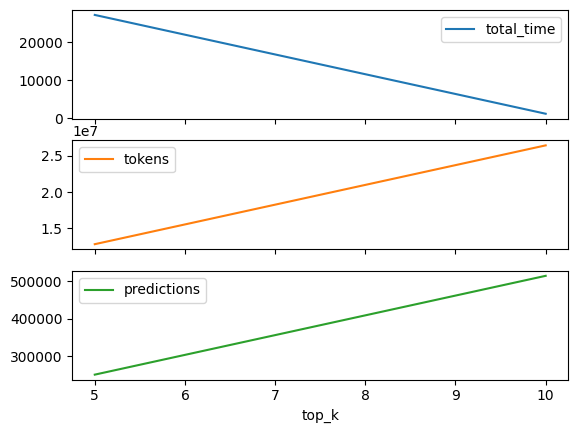

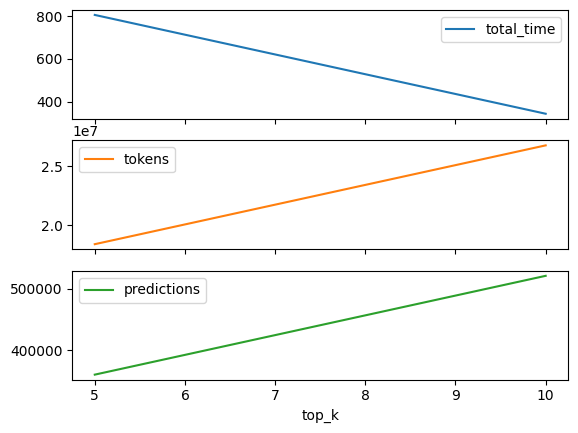

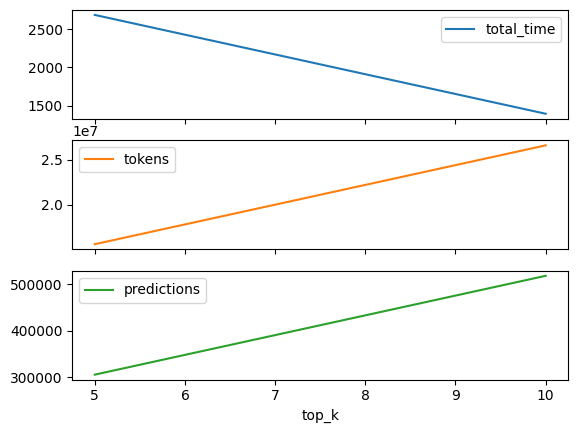

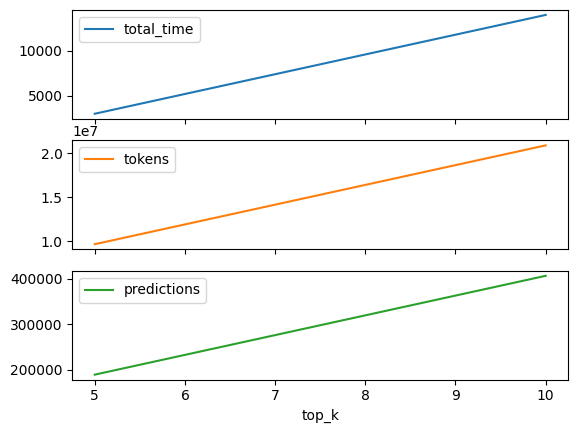

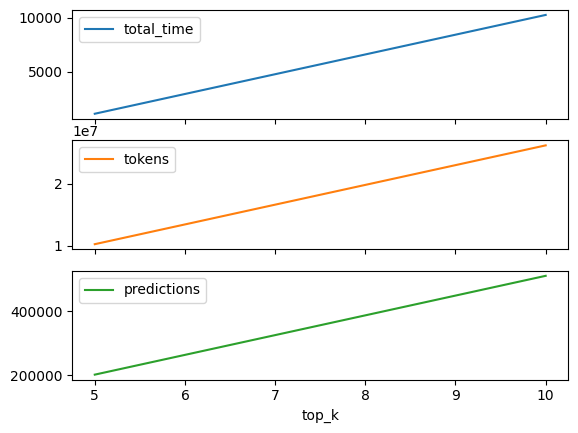

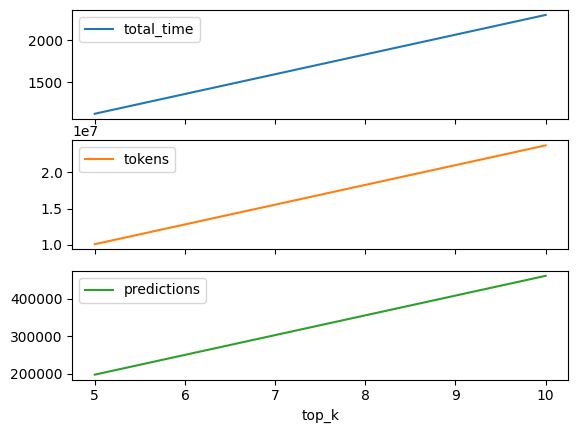

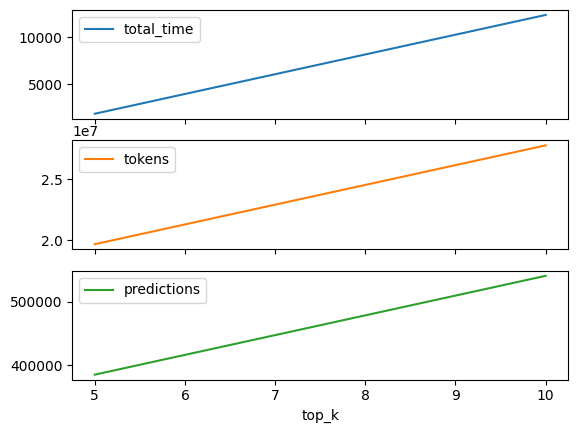

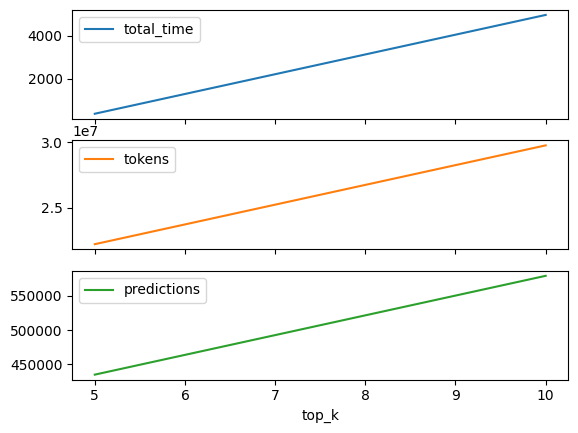

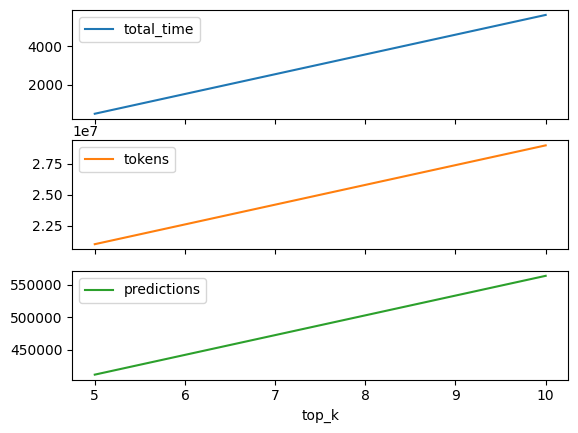

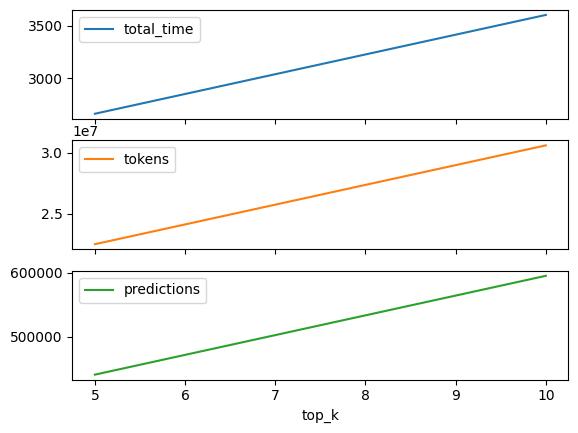

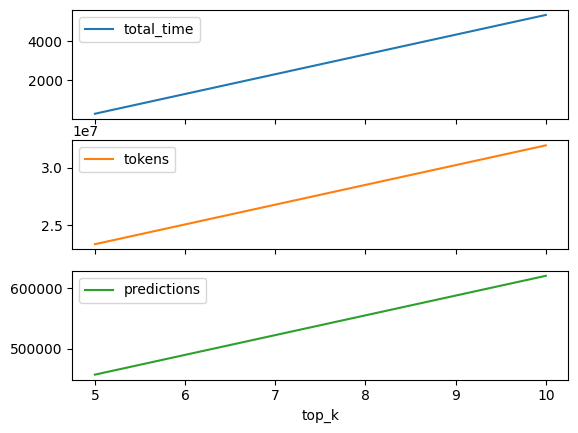

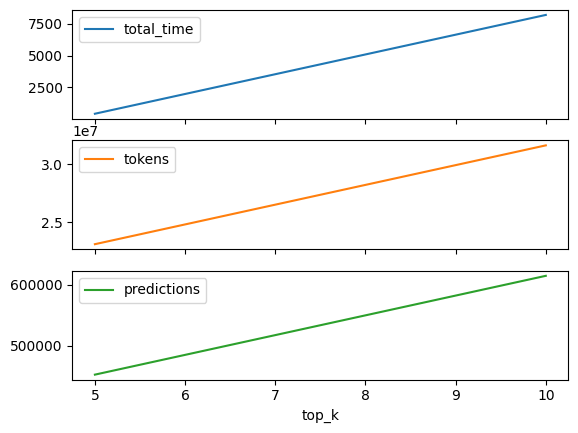

In [124]:
uncerta_data_grouped.plot.line(stacked=False, subplots=True, x='top_k', legend=True)

AttributeError: 'Legend' object has no attribute 'legendHandles'

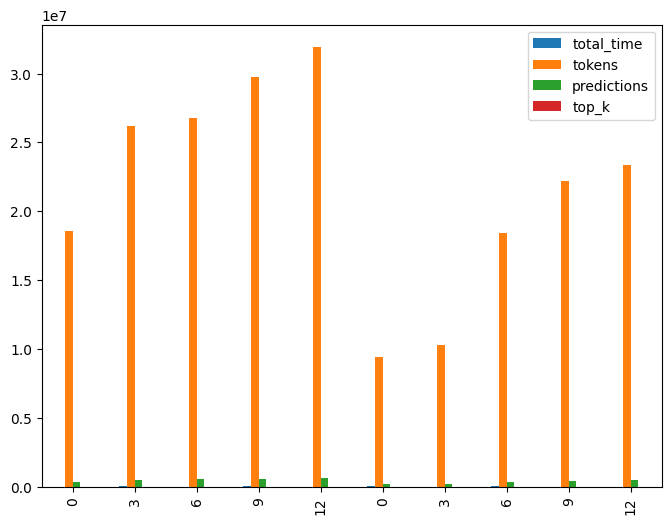

In [125]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))
bp = uncerta_data_filtered.groupby(['strategy']).plot(kind='bar', ax=ax)

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

def varying_k_graph(filtered_data, target_value, variables=['strategy', 'dataset', 'k']):
    df_melted = pd.melt(filtered_data, id_vars=variables, value_vars=[target_value], value_name=target_value)
    
    # Initialize the plot
    plt.figure(figsize=(12, 6))
    
    # Use seaborn to create a lineplot
    sns.lineplot(
        data=df_melted,
        x='k',
        y=target_value,
        hue='strategy',
        style='strategy',
        markers=True,
        dashes=True,
        palette='tab10', 
        err_style="bars", errorbar=("se", 0.15)
    )
    
    # Facet by strategy
    g = sns.FacetGrid(df_melted, col='strategy', height=6, aspect=1)
    g.map_dataframe(
        sns.lineplot,
        x='k',
        y=target_value,
        hue='variable',
        style='dataset',
        markers=True,
        dashes=True,
        palette='tab10'
    )
    
    # Titles and labels
    g.set_axis_labels('Top K', 'Tokens', fontsize=50)
    
    g.set_titles('Strategy: {col_name}')
    plt.legend(fontsize='x-large', title_fontsize='50')
    plt.suptitle(target_value+' vs K by Strategy and Dataset', y=1.05)
    plt.show()

/var/folders/mr/6xnd0hrs6257283btx8ff88r0000gn/T/ipykernel_23178/21936499.py:5: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_melted = pd.melt(filtered_data, id_vars=variables, value_vars=[target_value], value_name=target_value)


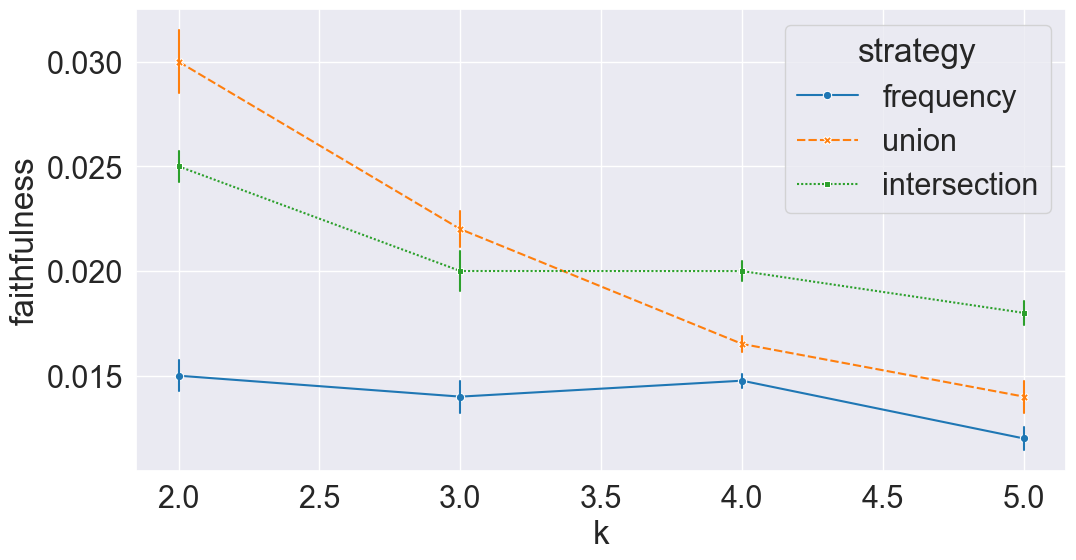

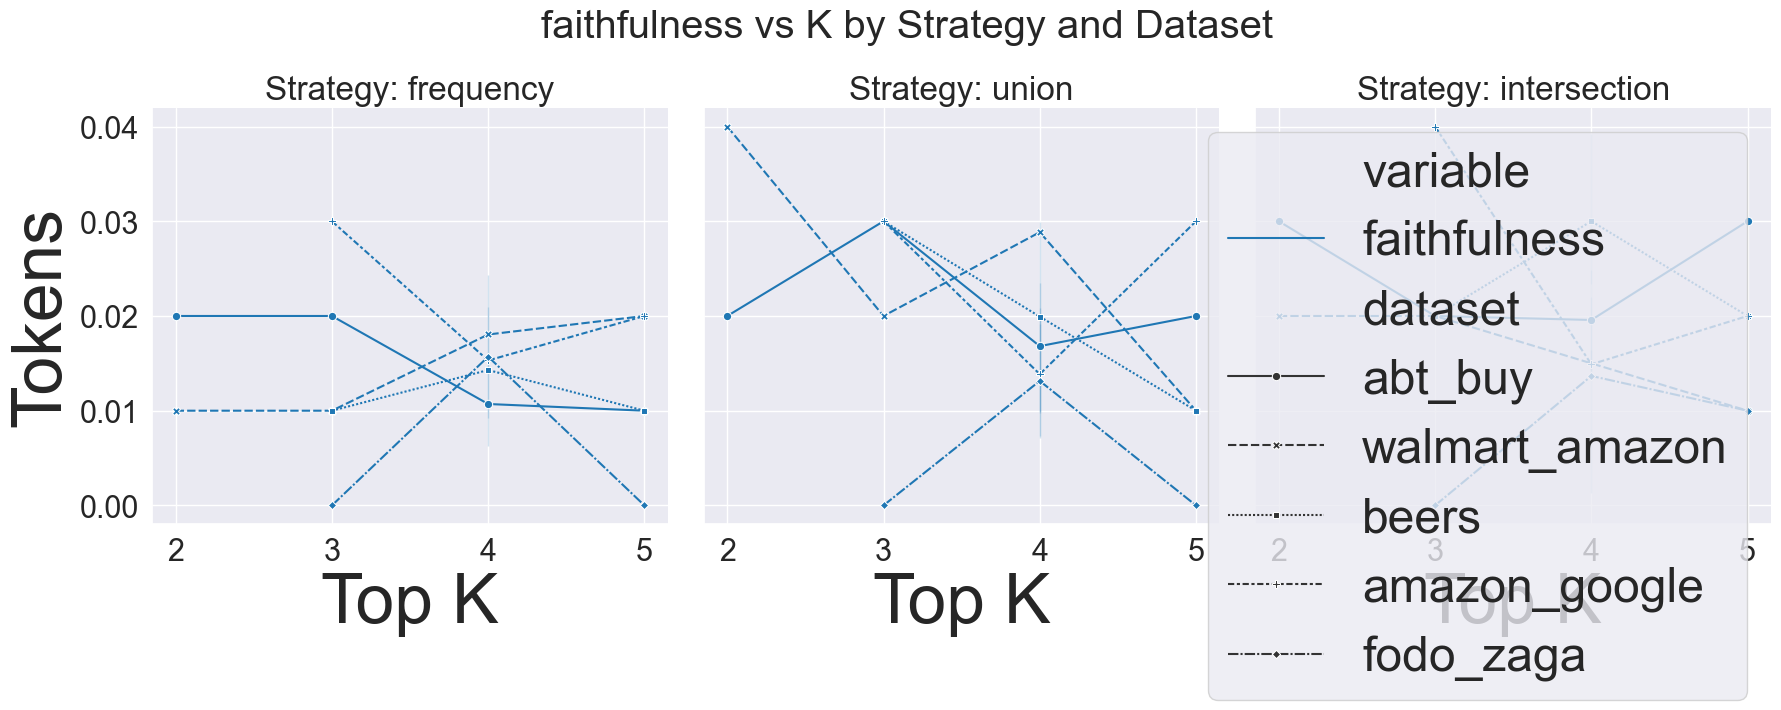

In [44]:
sns.set(font_scale=2)

target_value='faithfulness'
read_data = pd.read_csv('../combined_varying_k_data.csv')
varying_k_graph(read_data, target_value)

<Axes: xlabel='top_k'>

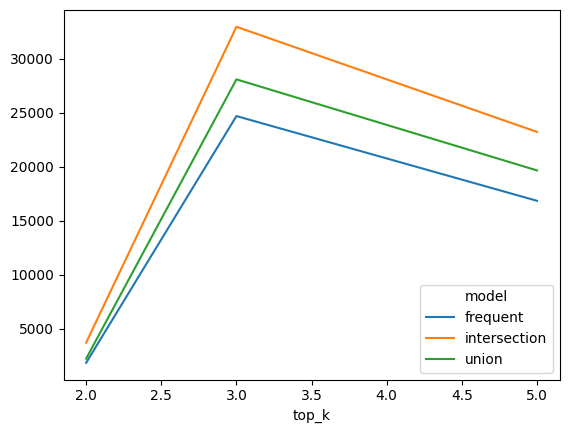

In [59]:
pd.pivot_table(df.reset_index(), index='top_k', columns=['model'], values='predictions').plot()